# Linear Regression

`Linear Regression` is a supervised machine learning algorithm where the predicted output is `continuous` and has a `constant slope`. It's used to predict values within a `continuous range`, (e.g. sales, price) rather than trying to classify them into categories (e.g. cat, dog). There are two main types:

- **Simple regression** - only one independent variable (e.g. sales)
- **Multiple regression** - more than one independent variables (e.g. sales, price)

## Simple Linear Regression

Simple linear regression is an approach for predicting a `response` using a single feature. It is assumed that the two variables are `linearly related`. Hence, we try to find a linear function that predicts the response value(y) as accurately as possible as a function of the feature or independent variable(x).

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# load the data tips from sns
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

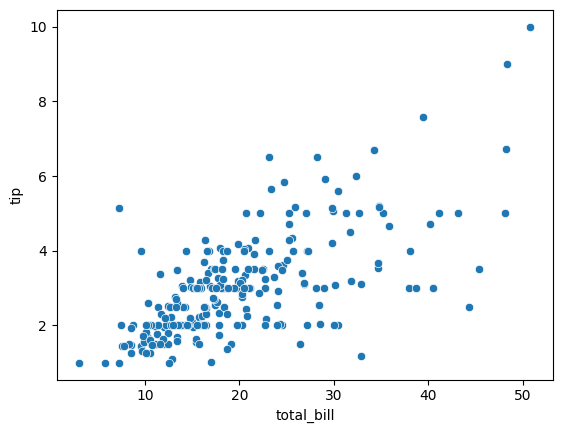

In [3]:
sns.scatterplot(x='total_bill', y='tip', data=df)

In [4]:
# dealing with outliers
from scipy.stats import zscore
z_scores = np.abs(zscore(df[['total_bill', 'tip']]))
threshold = 3
df_filtered = df[(z_scores < threshold).all(axis=1)]
print('Original shape:', df.shape)
print('Filtered shape:', df_filtered.shape)

Original shape: (244, 7)
Filtered shape: (239, 7)


In [5]:
# split the data into X and y
X = df[['total_bill']]
scalar = MinMaxScaler() # MinmaxScaler  is a scalar that represents the range of values between 0 and 1 
X = scalar.fit_transform(X)
y = df['tip']

In [6]:
# split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# call the model
model = LinearRegression()

In [8]:
# train the model
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# take out model intercept and slop, make an equation
print(model.intercept_)
print(model.coef_)
print('y = ', model.intercept_, '+', model.coef_, '* X')

1.2536141385948043
[5.10644737]
y =  1.2536141385948043 + [5.10644737] * X


In [10]:
# predict
y_pred = model.predict(X_test)

In [11]:
# evaluate the model
print('MSE = ', mean_squared_error(y_test, y_pred))
print('R2 = ', r2_score(y_test, y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE =  0.5688142529229534
R2 =  0.5449381659234667
RMSE =  0.7541977545199624


# Model Accuracy Evaluation

## Overview
The performance of a regression model is evaluated using several metrics. Here, we assess the model using Mean Squared Error (MSE), R-squared (R2), and Root Mean Squared Error (RMSE).

## Evaluation Metrics

- **Mean Squared Error (MSE)**: 0.5688
- **R-squared (R2)**: 0.5449
- **Root Mean Squared Error (RMSE)**: 0.7542

### Interpretation

- **MSE (0.5688)**:
  - This value indicates that the average squared difference between the actual and predicted values is 0.5688. Lower values of MSE are preferred as they indicate a better fit of the model to the data.

- **R-squared (0.5449)**:
  - An R-squared value of 0.5449 means that approximately 54.5% of the variance in the dependent variable can be explained by the model. This suggests a moderate fit. The ideal value of R-squared is 1, which indicates a perfect fit.

- **RMSE (0.7542)**:
  - The RMSE value of 0.7542 shows that, on average, the predicted values deviate from the actual values by 0.7542 units. Like MSE, lower values of RMSE indicate better model performance.

### Conclusion

The model has a moderate performance with an R-squared value of 0.5449, meaning it explains about 54.5% of the variance in the target variable. There is room for improvement in the model's accuracy. Consider techniques such as feature engineering, model selection, hyperparameter tuning, data cleaning, and cross-validation to enhance the model's performance.

By improving these areas, you can achieve better accuracy and a more reliable regression model.


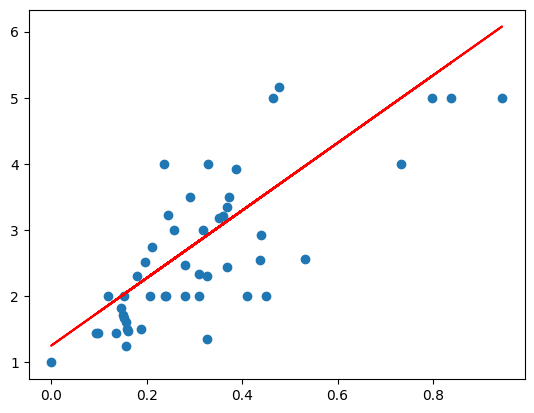

In [12]:
# plot the model and data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.show()